In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from fswap import RefFaceSwapping , TwoFaceSwapping


In [50]:
face_swapping = TwoFaceSwapping(reference_path='imgs/reference.png')

In [51]:
img = face_swapping.load_img('imgs/two.jpg')

In [58]:
img_swap = face_swapping(img)

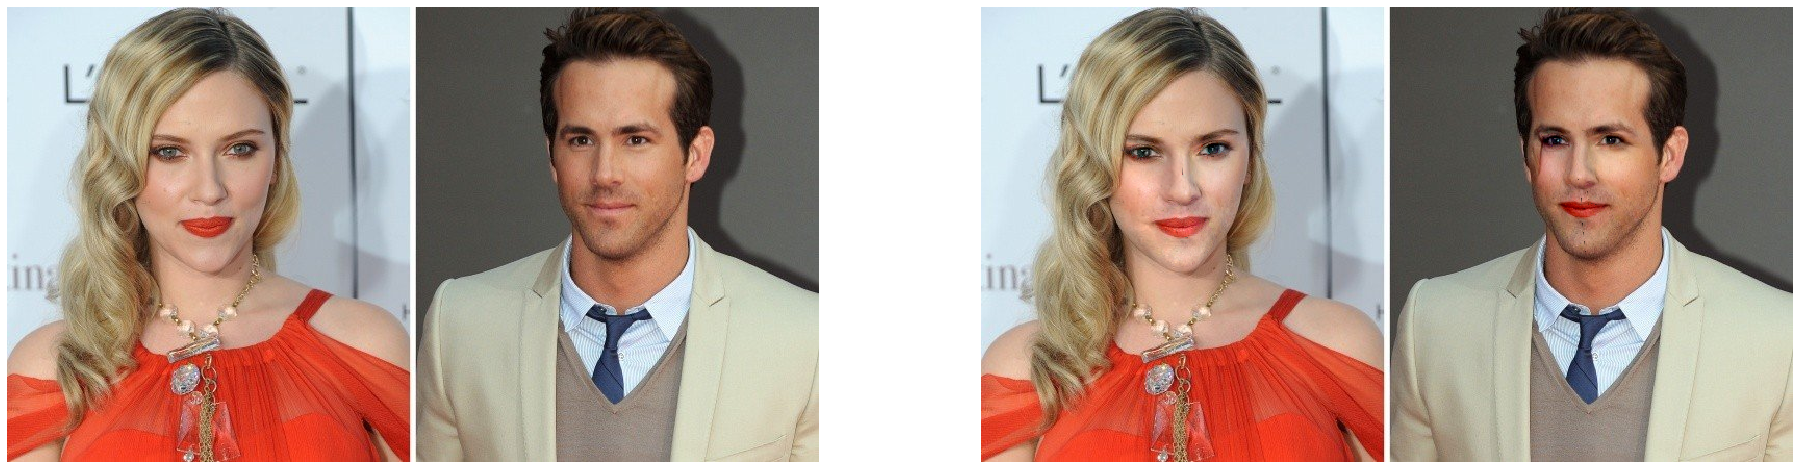

In [59]:
_, ax = plt.subplots(1, 2, figsize=(32,24))

ax[0].imshow(img)
ax[0].axis(False)

ax[1].imshow(img_swap)
ax[1].axis(False)

# plt.savefig('imgs/step_8.png')
plt.show()

In [17]:
from imutils.face_utils import rect_to_bb

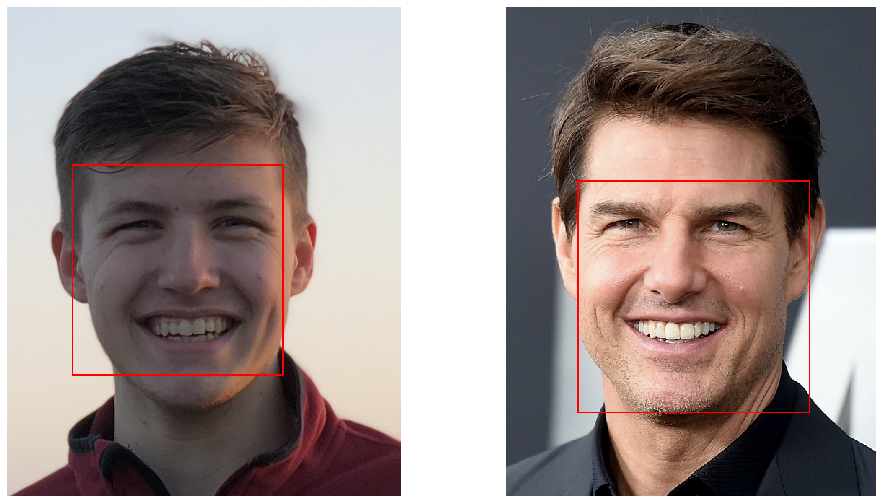

In [60]:
_, ax = plt.subplots(1, 2, figsize=(16,9))

img_copy = img.copy()
x, y, w, h = rect_to_bb(face_swapping.detector(img)[0])
ax[0].imshow(cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255,0,0),3))
ax[0].axis(False)

img_copy = face_swapping.ref_img.copy()
x, y, w, h = rect_to_bb(face_swapping.detector(img)[0])
ax[1].imshow(cv2.rectangle(img_copy, (x, y), (x+w, y+h), (255,0,0),3))
ax[1].axis(False)

plt.savefig('imgs/step_1.png')
plt.show()

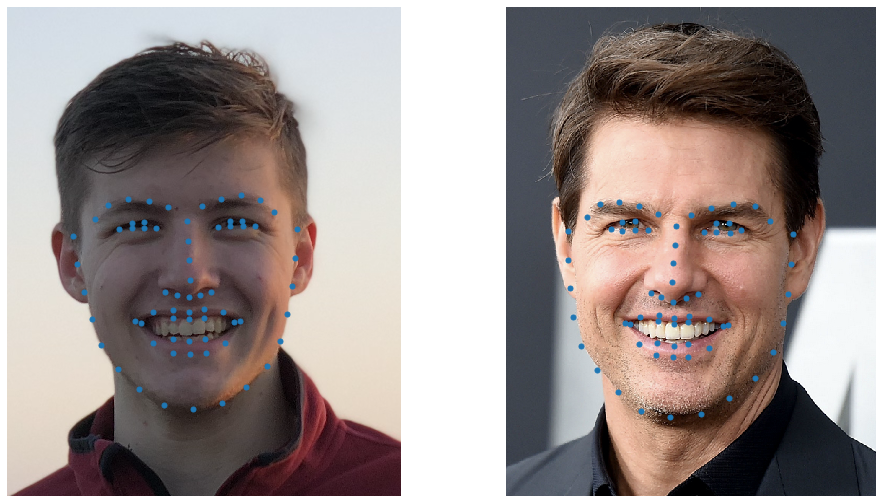

In [67]:
_, ax = plt.subplots(1, 2, figsize=(16,9))

img_copy = img.copy()
kp = face_swapping.find_keypoints(img_copy)
ax[0].imshow(img_copy)
ax[0].plot(kp.T[0], kp.T[1], 'o', ms=5)
ax[0].axis(False)
    
img_copy = face_swapping.ref_img.copy()
kp = face_swapping.ref_keypoints
ax[1].imshow(img_copy)
ax[1].plot(kp.T[0], kp.T[1], 'o', ms=5)
ax[1].axis(False)

plt.savefig('imgs/step_2.png')
plt.show()

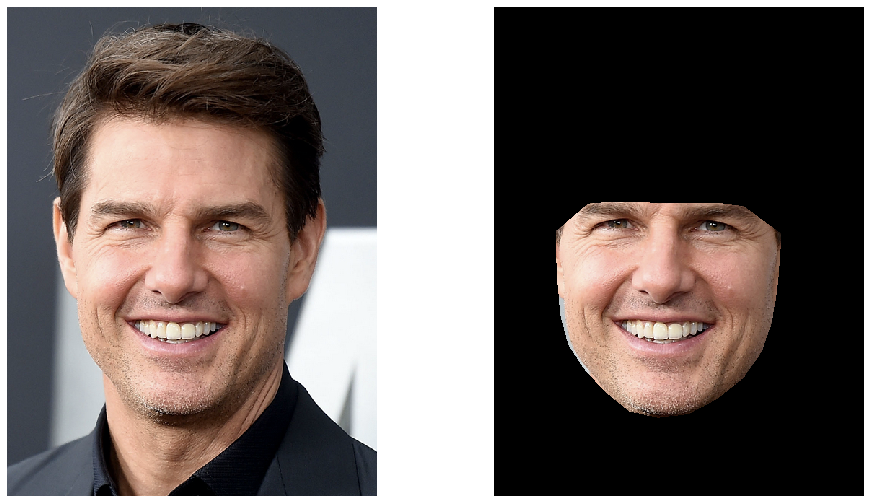

In [68]:
_, ax = plt.subplots(1, 2, figsize=(16,9))

face = face_swapping.ref_face.copy()
ax[0].imshow(face_swapping.ref_img)
ax[0].axis(False)

ax[1].imshow(face)
ax[1].axis(False)


plt.savefig('imgs/step_3.png')
plt.show()

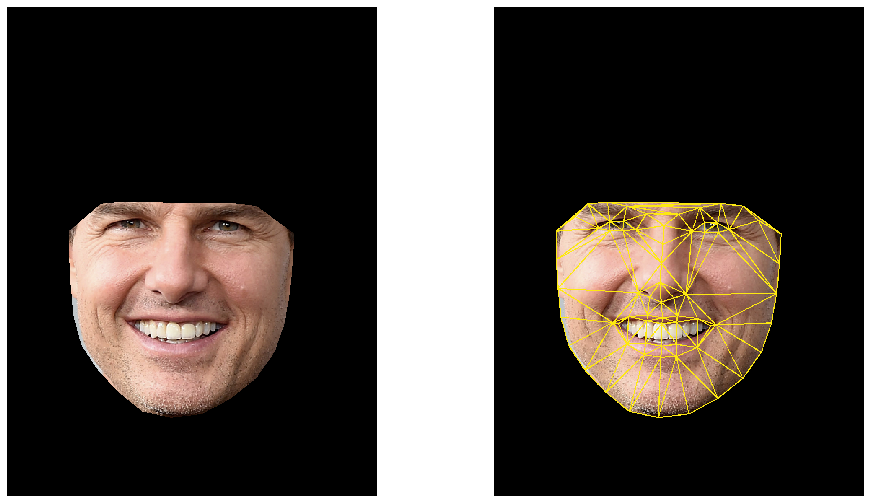

In [74]:
_, ax = plt.subplots(1, 2, figsize=(16,9))

color = (253, 233, 16)
face = face_swapping.ref_face.copy()
ax[0].imshow(face)


for (i1, i2, i3) in face_swapping.ref_traingles_indxs:
    pt1 = tuple(face_swapping.ref_keypoints[i1])
    pt2 = tuple(face_swapping.ref_keypoints[i2])
    pt3 = tuple(face_swapping.ref_keypoints[i3])
    
    cv2.line(face, pt1, pt2, color, 2)
    cv2.line(face, pt3, pt2, color, 2)
    cv2.line(face, pt1, pt3, color, 2)

ax[1].imshow(face)

ax[0].axis(False)
ax[1].axis(False)
plt.savefig('imgs/step_4.png')
plt.show()

In [1]:
import numpy as np
import cv2
from fswap import RefFaceSwapping
import traceback

face_swapping = RefFaceSwapping(reference_path='imgs/stone.png', color_format='BGR')

In [ ]:
cv2.add()

In [2]:

cap = cv2.VideoCapture(0)

while(True):
    try:
        ret, frame = cap.read()
        if frame is None:
            print('bl')
        cv2.imshow("preview", face_swapping(frame))
#         cv2.imshow('preview', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    except Exception as e:
        print('Ошибка:', traceback.format_exc())
        break
    

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

bl
Ошибка: Traceback (most recent call last):
  File "<ipython-input-2-7ef57352cead>", line 9, in <module>
    cv2.imshow("preview", face_swapping(frame))
  File "/Users/nikita/Documents/github/FaceSwapping/fswap/ref_swap.py", line 69, in __call__
    keypoints = self.find_keypoints(img)
  File "/Users/nikita/Documents/github/FaceSwapping/fswap/base.py", line 45, in find_keypoints
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2.error: OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


